<a href="https://colab.research.google.com/github/vinayasri1574/expense-tracker/blob/main/Analyze_and_Provide_Insights_on_Amazon_Sales_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Analyze and Provide Insights on Amazon Sales Report

In [ ]:
import gdown
import pandas as pd

# Define the Google Drive file URL
url = 'https://drive.google.com/uc?id=1YrjYKtS1WHmINL6eafRsrDzrZaw2_WvX'

# Download the dataset from the Google Drive link
output = 'Amazon_Sale_Report.csv'
gdown.download(url, output, quiet=False)

# Load the dataset into a pandas DataFrame
data = pd.read_csv(output)

# Display the first few rows of the dataset
print(data.head())

Downloading...
From: https://drive.google.com/uc?id=1YrjYKtS1WHmINL6eafRsrDzrZaw2_WvX
To: /content/Amazon_Sale_Report.csv
100%|██████████| 19.1M/19.1M [00:00<00:00, 72.5MB/s]


   index             Order ID      Date                        Status  \
0      0  405-8078784-5731545  04-30-22                     Cancelled   
1      1  171-9198151-1101146  04-30-22  Shipped - Delivered to Buyer   
2      2  404-0687676-7273146  04-30-22                       Shipped   
3      3  403-9615377-8133951  04-30-22                     Cancelled   
4      4  407-1069790-7240320  04-30-22                       Shipped   

  Fulfilment Sales Channel ship-service-level  Category Size Courier Status  \
0   Merchant     Amazon.in           Standard   T-shirt    S     On the Way   
1   Merchant     Amazon.in           Standard     Shirt  3XL        Shipped   
2     Amazon     Amazon.in          Expedited     Shirt   XL        Shipped   
3   Merchant     Amazon.in           Standard   Blazzer    L     On the Way   
4     Amazon     Amazon.in          Expedited  Trousers  3XL        Shipped   

   ...  currency  Amount    ship-city   ship-state ship-postal-code  \
0  ...       IN

In [ ]:
import pandas as pd

# Convert 'Date' column to datetime format, interpreting the first two digits as the day
data['Date'] = pd.to_datetime(data['Date'], format='%m-%d-%y', dayfirst=True, errors = 'coerce')

# Print the first few rows of the dataset
print(data.head())

   index             Order ID       Date                        Status  \
0      0  405-8078784-5731545 2022-04-30                     Cancelled   
1      1  171-9198151-1101146 2022-04-30  Shipped - Delivered to Buyer   
2      2  404-0687676-7273146 2022-04-30                       Shipped   
3      3  403-9615377-8133951 2022-04-30                     Cancelled   
4      4  407-1069790-7240320 2022-04-30                       Shipped   

  Fulfilment Sales Channel ship-service-level  Category Size Courier Status  \
0   Merchant     Amazon.in           Standard   T-shirt    S     On the Way   
1   Merchant     Amazon.in           Standard     Shirt  3XL        Shipped   
2     Amazon     Amazon.in          Expedited     Shirt   XL        Shipped   
3   Merchant     Amazon.in           Standard   Blazzer    L     On the Way   
4     Amazon     Amazon.in          Expedited  Trousers  3XL        Shipped   

   ...  currency  Amount    ship-city   ship-state ship-postal-code  \
0  ...   

In [ ]:
# Group by date and sum the 'Amount' column to get total sales for each day
daily_sales = data.groupby('Date')['Amount'].sum()

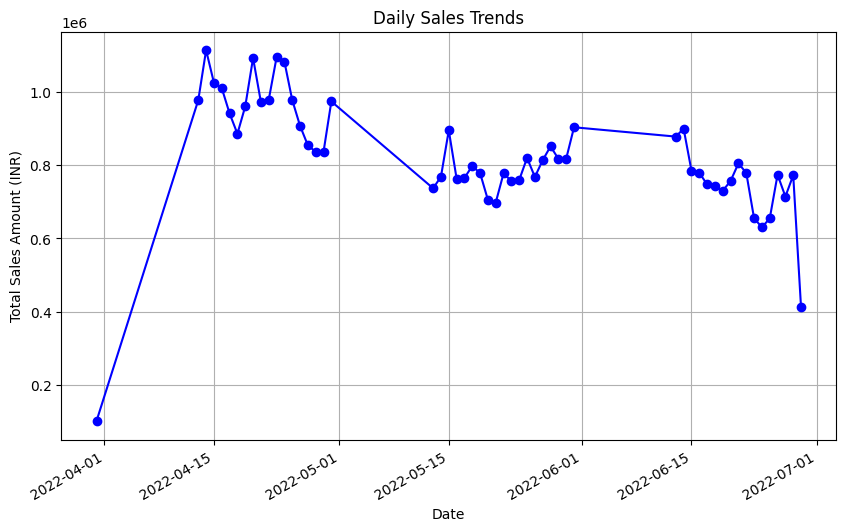

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
daily_sales.plot(kind='line', marker='o', color='blue')
plt.title('Daily Sales Trends')
plt.xlabel('Date')
plt.ylabel('Total Sales Amount (INR)')
plt.grid(True)
plt.show()

2. Product Analysis:

In [ ]:
# Group the data by 'Category', 'Size', and 'Qty' columns and aggregate to count the total quantity sold
product_analysis = data.groupby(['Category', 'Size']).agg({'Qty': 'sum'}).reset_index()

# Sort the aggregated data by total quantity sold in descending order to identify popular products
popular_products = product_analysis.sort_values(by='Qty', ascending=False)

# Display the top 10 popular products
print("Top 10 Popular Products:")
print(popular_products.head(10))

Top 10 Popular Products:
   Category Size   Qty
31  T-shirt    M  8362
12    Shirt    L  8049
15    Shirt   XL  7837
13    Shirt    M  7706
30  T-shirt    L  7396
17    Shirt  XXL  6946
33  T-shirt   XL  6874
32  T-shirt    S  6704
35  T-shirt  XXL  5604
26  T-shirt  3XL  5287


3. Fulfillment Analysis:

In [ ]:
# Group the data by the 'Fulfilment' column and count the number of orders for each fulfillment method
fulfillment_analysis = data.groupby('Fulfilment').size().reset_index(name='Order Count')

# Display the count of orders for each fulfillment method
print("Fulfillment Analysis - Order Count:")
print(fulfillment_analysis)

# Analyze the effectiveness of each fulfillment method in delivering orders
fulfillment_status_analysis = data.groupby(['Fulfilment', 'Status']).size().unstack(fill_value=0)

# Display the status of orders for each fulfillment method
print("\nFulfillment Status Analysis:")
print(fulfillment_status_analysis)

Fulfillment Analysis - Order Count:
  Fulfilment  Order Count
0     Amazon        89713
1   Merchant        39263

Fulfillment Status Analysis:
Status      Cancelled  Pending  Pending - Waiting for Pick Up  Shipped  \
Fulfilment                                                               
Amazon          11475      415                              0    77815   
Merchant         6859      243                            281        0   

Status      Shipped - Damaged  Shipped - Delivered to Buyer  \
Fulfilment                                                    
Amazon                      0                             0   
Merchant                    1                         28756   

Status      Shipped - Lost in Transit  Shipped - Out for Delivery  \
Fulfilment                                                          
Amazon                              0                           0   
Merchant                            5                          35   

Status      Shipped - Picked 

4. Customer SegmentaƟon:

<ipython-input-18-3bf76380df84>:3: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/Amazon Sale Report (1).csv")
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


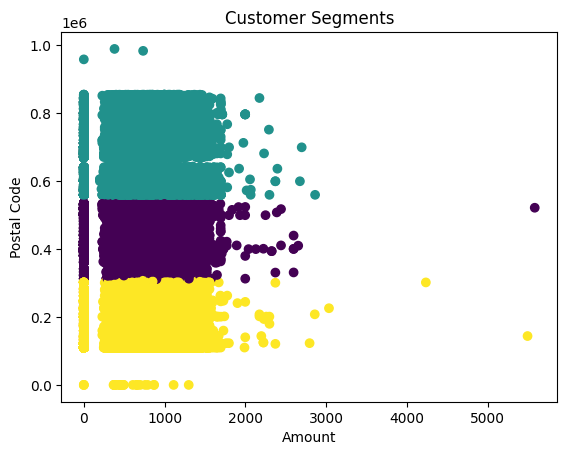

In [ ]:
import pandas as pd

df = pd.read_csv("/content/Amazon Sale Report (1).csv")

# Select relevant features
features = ['Amount', 'ship-postal-code', 'Sales Channel', 'Category']

# Convert non-numeric columns to numeric
for col in features:
    if df[col].dtype == 'object':
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Handle invalid values
df[features] = df[features].fillna(0)  # Replace NaN with 0
df[features] = df[features].clip(lower=0)  # Clip values below 0 to 0

# Pre-process the data
df[features] = df[features].fillna(df[features].mean())

# Segment customers using K-means clustering
kmeans = KMeans(n_clusters=3)
kmeans.fit(df[features])

# Analyze the resulting segments
segment_labels = kmeans.labels_

# Visualize the segments
import matplotlib.pyplot as plt

plt.scatter(df['Amount'], df['ship-postal-code'], c=segment_labels)
plt.xlabel("Amount")
plt.ylabel("Postal Code")
plt.title("Customer Segments")
plt.show()

5.Geographical Analysis

In [ ]:
import numpy as np

# Read the CSV file without specifying data types
df = pd.read_csv("/content/Amazon Sale Report (1).csv")

# Replace missing values in the 10th column with NaN
df['ship-postal-code'] = df['ship-postal-code'].replace('', np.nan)

<ipython-input-25-7d4a5a633456>:4: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/Amazon Sale Report (1).csv")


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113584 entries, 0 to 113583
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               113584 non-null  int64  
 1   Order ID            113584 non-null  object 
 2   Date                113584 non-null  object 
 3   Status              113584 non-null  object 
 4   Fulfilment          113583 non-null  object 
 5   Sales Channel       113583 non-null  object 
 6   ship-service-level  113583 non-null  object 
 7   Category            113583 non-null  object 
 8   Size                113583 non-null  object 
 9   Courier Status      113583 non-null  object 
 10  Qty                 113583 non-null  float64
 11  currency            106696 non-null  object 
 12  Amount              106696 non-null  float64
 13  ship-city           113554 non-null  object 
 14  ship-state          113554 non-null  object 
 15  ship-postal-code    113554 non-nul

In [ ]:
df['ship-city'].value_counts().head(10)

ship-city
BENGALURU    9688
HYDERABAD    7015
MUMBAI       5438
NEW DELHI    5113
CHENNAI      4688
PUNE         3384
KOLKATA      2162
GURUGRAM     1654
THANE        1514
LUCKNOW      1272
Name: count, dtype: int64

In [ ]:
df.groupby('ship-state')['Amount'].mean()

ship-state
ANDAMAN & NICOBAR    655.839484
ANDHRA PRADESH       634.591876
APO                         NaN
AR                   493.000000
ARUNACHAL PRADESH    709.135593
                        ...    
goa                  493.400000
orissa               597.000000
punjab               663.230769
rajasthan            657.666667
rajsthan             521.000000
Name: Amount, Length: 67, dtype: float64

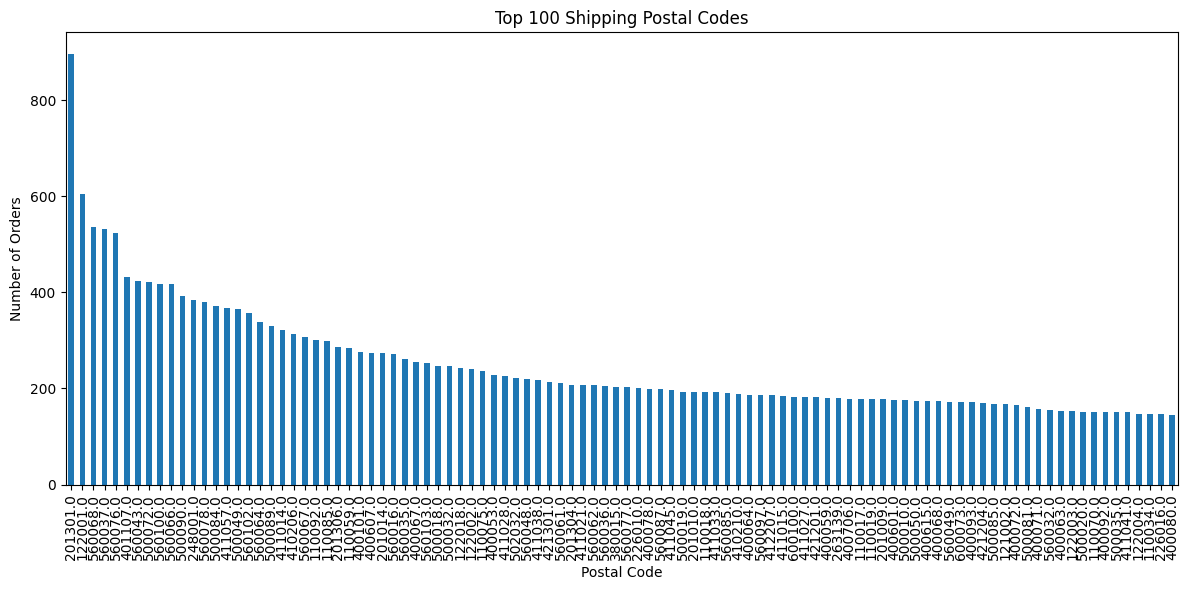

In [ ]:
import matplotlib.pyplot as plt

# Get the top 100 postal codes by order count
postal_codes = df['ship-postal-code'].value_counts().head(100)

# Create the bar chart
plt.figure(figsize=(12, 6))
postal_codes.plot(kind='bar')

# Add labels and title
plt.xlabel("Postal Code")
plt.ylabel("Number of Orders")
plt.title("Top 100 Shipping Postal Codes")

# Improve clarity
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Improve spacing between chart elements

plt.show()

6. Business Insights

<ipython-input-31-145a14fbced9>:5: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/Amazon Sale Report (1).csv")


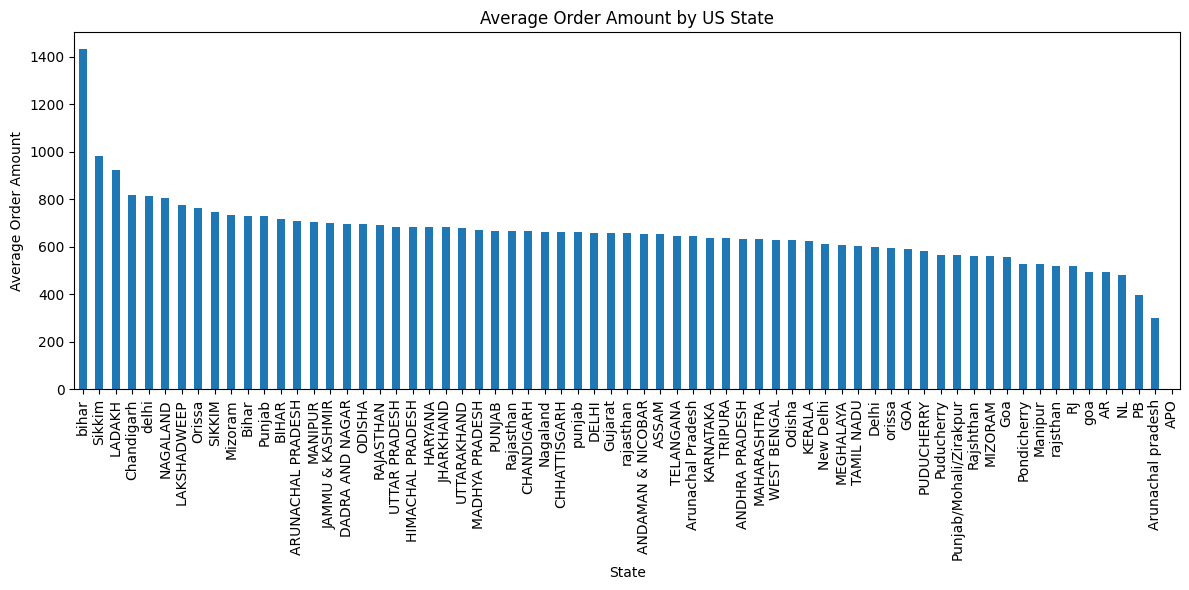

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv("/content/Amazon Sale Report (1).csv")

# Calculate average order amount for each state
avg_order_amount_by_state = df.groupby('ship-state')['Amount'].mean()

# Sort by average order amount
avg_order_amount_by_state = avg_order_amount_by_state.sort_values(ascending=False)

# Create the bar chart
plt.figure(figsize=(12, 6))
avg_order_amount_by_state.plot(kind='bar')

# Add labels and title
plt.xlabel("State")
plt.ylabel("Average Order Amount")
plt.title("Average Order Amount by US State")

# Improve clarity
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Improve spacing between chart elements

plt.show()

recommendations

In [ ]:
import pandas as pd

# Read the CSV file
df = pd.read_csv("/content/Amazon Sale Report (1).csv")

# Calculate key metrics
total_sales = df['Amount'].sum()
average_order_value = df['Amount'].mean()
customer_count = df['Order ID'].nunique()

# Identify top-selling products
top_selling_products = df.groupby('Category')['Amount'].sum().sort_values(ascending=False).head(5)

# Analyze customer behavior
repeat_customers = df[df['Order ID'].duplicated(keep=False)]
customer_retention_rate = len(repeat_customers) / customer_count

# Provide actionable recommendations
recommendations = []

# Recommendation 1: Focus on high-potential product categories
recommendations.append(f"Invest more marketing resources in top-selling product categories: {list(top_selling_products.index)}")

# Recommendation 2: Implement strategies to increase customer retention
recommendations.append(f"Improve customer retention rate of {customer_retention_rate:.0%} by implementing loyalty programs or personalized marketing campaigns.")

# Recommendation 3: Analyze customer feedback to identify areas for improvement
recommendations.append("Regularly analyze customer feedback to identify pain points and opportunities to enhance customer experience.")

# Print the recommendations
for recommendation in recommendations:
    print(recommendation)

<ipython-input-32-79766f0bb043>:4: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/Amazon Sale Report (1).csv")


Invest more marketing resources in top-selling product categories: ['T-shirt', 'Shirt', 'Blazzer', 'Trousers', 'Perfume']
Improve customer retention rate of 13% by implementing loyalty programs or personalized marketing campaigns.
Regularly analyze customer feedback to identify pain points and opportunities to enhance customer experience.


<ipython-input-36-9f0bce736f3d>:6: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/Amazon Sale Report (1).csv")


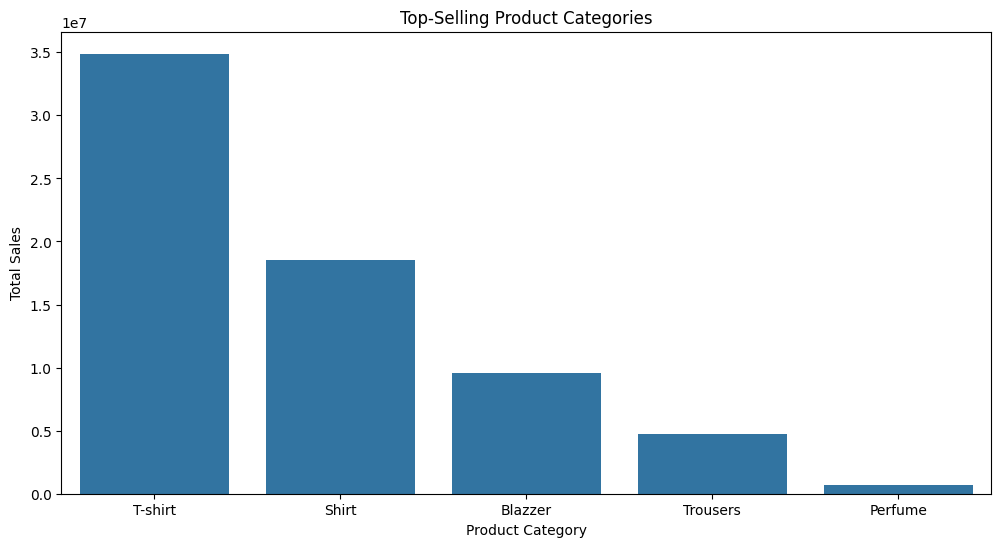

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file
df = pd.read_csv("/content/Amazon Sale Report (1).csv")

# Create a bar chart of top-selling product categories
top_selling_products = df.groupby('Category')['Amount'].sum().sort_values(ascending=False).head(5)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_selling_products.index, y=top_selling_products.values)
plt.xlabel("Product Category")
plt.ylabel("Total Sales")
plt.title("Top-Selling Product Categories")
plt.show()

